# Overload and overlap study
Perform calculations with the artificial matrix to quantify on what depends the ability to decontextualize this information

In [2]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [3]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '7c58fc806068b39902b233eb73185ed08a5a218c'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [4]:
from network import Protocol, BCPNNFast, NetworkManager
from analysis_functions import calculate_recall_success_sequences
from connectivity_functions import create_artificial_manager 

## Overload

#### An example
First a simple example

In [20]:
# Patterns parameters
hypercolumns = 4
minicolumns = 70
n_patterns = 60

dt = 0.001

# Sequence protocol
number_of_sequences = 4
half_width = 3
units_to_overload = [0, 1]

# Build chain protocol
chain_protocol = Protocol()
sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)

beta = False
value = 1.0
inhbition = -1.0
extension = 6
decay_factor = 0.5
sequence_decay  = 1.0
tau_z_pre = 0.150

manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=inhbition,
                                    extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                    dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)

manager.nn.tau_z_pre = tau_z_pre

In [21]:
n = 5
T_cue = 0.100
T_recall = 5.0

successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, sequences=sequences)

In [22]:
sequences

[[2, 3, 4, 0, 1, 5, 6, 7],
 [8, 9, 10, 0, 1, 11, 12, 13],
 [14, 15, 16, 0, 1, 17, 18, 19],
 [20, 21, 22, 0, 1, 23, 24, 25]]

In [23]:
successes

[100.0, 100.0, 100.0, 100.0]

## Overlap

#### An example to toy around

In [ ]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 20

dt = 0.001

beta = False
value = 2
inhibition = -1.0
extension = 6
decay_factor = 0.3
sequence_decay = 0.0
tau_z_pre = 0.150

overlap = 2
number_of_sequences = 2
half_width = 4
units_to_overload = [i for i in range(overlap)]

# Build chain protocol
chain_protocol = Protocol()

sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)
# sequences = [[0, 1, 2, 3, 4, 5]]
manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value,
                                inhibition=inhibition,
                                extension=extension, decay_factor=decay_factor,
                                sequence_decay=sequence_decay,
                                dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True,
                                beta=beta)

manager.nn.tau_z_pre = tau_z_pre

n = 1
T_cue = 0.100
T_recall = 10.0
I_cue1 = sequences[0][0]
I_cue2 = sequences[1][0]

success1 = calculate_recall_success(manager, T_recall=T_recall, I_cue=I_cue1, T_cue=T_cue, n=n,
                                    patterns_indexes=sequences[0])
timings1 = calculate_timings(manager, remove=0.010)
patterns1 = [x[0] for x in timings1]

success2 = calculate_recall_success(manager, T_recall=T_recall, I_cue=I_cue2, T_cue=T_cue, n=n,
                                    patterns_indexes=sequences[1])
timings2 = calculate_timings(manager, remove=0.010)
patterns2 = [x[0] for x in timings2]

#### Value calculations

In [45]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50

dt = 0.001

# Recall 
n = 10
T_cue = 0.100
T_recall = 10.0

# Artificial matrix
beta = False
value = 5
inhibition = -1.0
extension = 6
decay_factor = 0.1
sequence_decay = 0.0
tau_z_pre = 0.150

# Sequence structure
overlap = 3
number_of_sequences = 2
half_width = 4

overlap_vector = np.arange(1, 10, 1, dtype=int)
value_vector = np.arange(1, 11, 1)
total_success = np.zeros((overlap_vector.size, value_vector.size))

In [46]:
# Sequence protocol
for overlap_index, overlap in enumerate(overlap_vector):
    print('overlap, index', overlap_index)
    for value_index, value in enumerate(value_vector):
        units_to_overload = [i for i in range(overlap)]

        # Build chain protocol
        chain_protocol = Protocol()
        sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)

        manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                            extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                            dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)

        manager.nn.tau_z_pre = tau_z_pre

        successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, sequences=sequences)
        total_success[overlap_index, value_index] = np.mean(successes)

('overlap, index', 0)
('overlap, index', 1)
('overlap, index', 2)
('overlap, index', 3)
('overlap, index', 4)
('overlap, index', 5)
('overlap, index', 6)
('overlap, index', 7)
('overlap, index', 8)


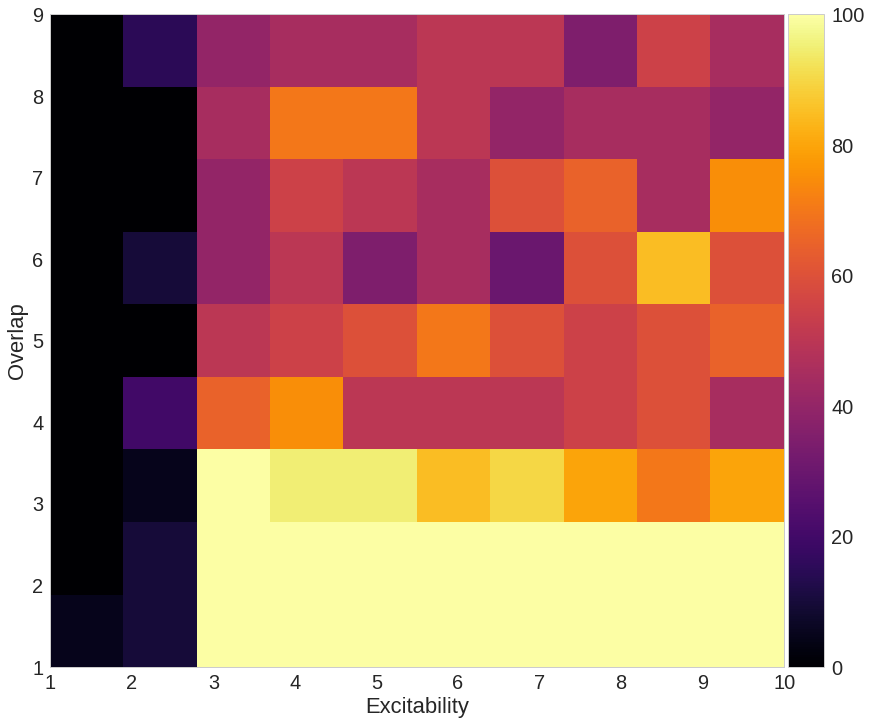

In [47]:
sns.set_style("whitegrid", {'axes.grid': False})

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
cmap = 'inferno'
extent = [value_vector[0], value_vector[-1], overlap_vector[0], overlap_vector[-1]]
im = ax.imshow(total_success, cmap=cmap, origin='lower', interpolation='None', extent=extent, aspect='auto')

ax.set_xlabel('Excitability')
ax.set_ylabel('Overlap')


divider1 = make_axes_locatable(ax)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax1, orientation='vertical');

#### Tau_z calculations

In [48]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50

dt = 0.001

# Recall 
n = 10
T_cue = 0.100
T_recall = 10.0

# Artificial matrix
beta = False
value = 5
inhibition = -1.0
extension = 6
decay_factor = 0.1
sequence_decay = 0.1
tau_z_pre = 0.150

# Sequence structure
overlap = 3
number_of_sequences = 2
half_width = 4

overlap_vector = np.arange(1, 10, 1, dtype=int)
tau_z_pre_vector = np.arange(0.050, 1.050, 0.050)
total_success_tau_z = np.zeros((overlap_vector.size, tau_z_pre_vector.size))

In [49]:
for overlap_index, overlap in enumerate(overlap_vector):
    print('overlap, index', overlap_index)
    for tau_z_pre_index, tau_z_pre in enumerate(tau_z_pre_vector):

        units_to_overload = [i for i in range(overlap)]

        # Build chain protocol
        chain_protocol = Protocol()
        sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)

        manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value,
                                            inhibition=inhibition,
                                            extension=extension, decay_factor=decay_factor,
                                            sequence_decay=sequence_decay,
                                            dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True,
                                            beta=beta)

        manager.nn.tau_z_pre = tau_z_pre

        successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, sequences=sequences)
        total_success_tau_z[overlap_index, tau_z_pre_index] = np.mean(successes)

('overlap, index', 0)
('overlap, index', 1)
('overlap, index', 2)
('overlap, index', 3)
('overlap, index', 4)
('overlap, index', 5)
('overlap, index', 6)
('overlap, index', 7)
('overlap, index', 8)


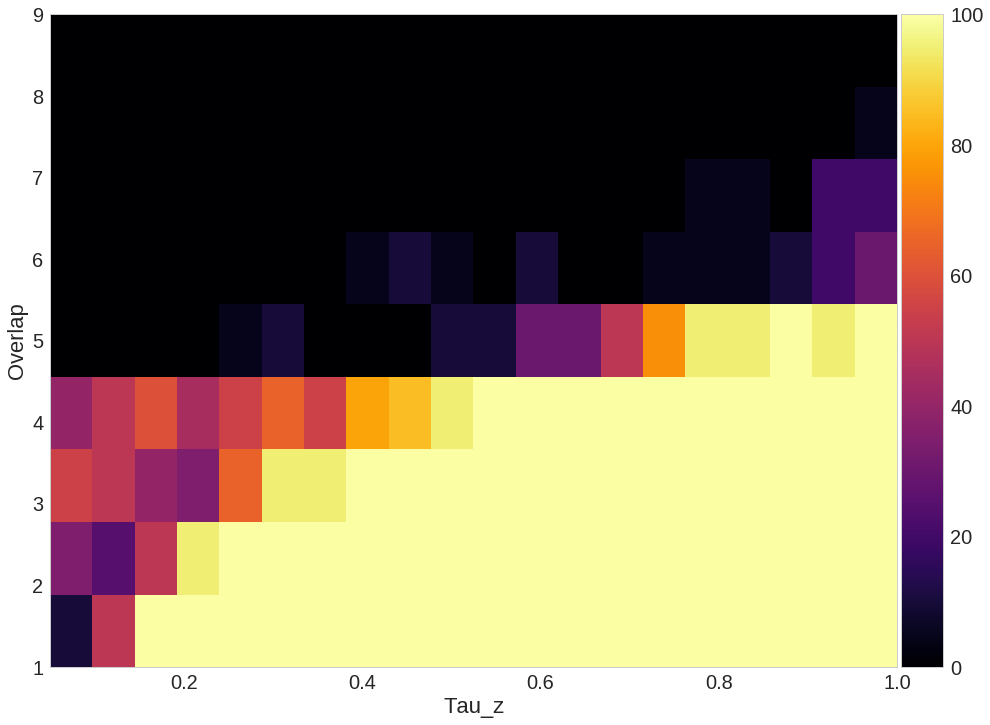

In [50]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
cmap = 'inferno'
extent = [tau_z_pre_vector[0], tau_z_pre_vector[-1], overlap_vector[0], overlap_vector[-1]]

im = ax.imshow(total_success_tau_z, origin='lower', cmap=cmap, interpolation='None', extent=extent, aspect='auto')

ax.set_xlabel('Tau_z')
ax.set_ylabel('Overlap')

divider1 = make_axes_locatable(ax)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax1, orientation='vertical');

#### Extension

In [51]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50

dt = 0.001

# Recall 
n = 10
T_cue = 0.100
T_recall = 10.0

# Artificial matrix
beta = False
value = 5
inhibition = -1.0
extension = 6
decay_factor = 0.1
sequence_decay = 0.1
tau_z_pre = 0.150

# Sequence structure
overlap = 3
number_of_sequences = 2
half_width = 4

overlap_vector = np.arange(1, 10, 1, dtype=int)
extension_vector = np.arange(1, 10, 1)
total_success_extension = np.zeros((overlap_vector.size, extension_vector.size))

In [52]:
for overlap_index, overlap in enumerate(overlap_vector):
    print('overlap, index', overlap_index)
    for extension_index, extension in enumerate(extension_vector):

        units_to_overload = [i for i in range(overlap)]

        # Build chain protocol
        chain_protocol = Protocol()
        sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)

        manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value,
                                            inhibition=inhibition,
                                            extension=extension, decay_factor=decay_factor,
                                            sequence_decay=sequence_decay,
                                            dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True,
                                            beta=beta)

        manager.nn.tau_z_pre = tau_z_pre

        successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, sequences=sequences)
        total_success_extension[overlap_index, extension_index] = np.mean(successes)

('overlap, index', 0)
('overlap, index', 1)
('overlap, index', 2)
('overlap, index', 3)
('overlap, index', 4)
('overlap, index', 5)
('overlap, index', 6)
('overlap, index', 7)
('overlap, index', 8)


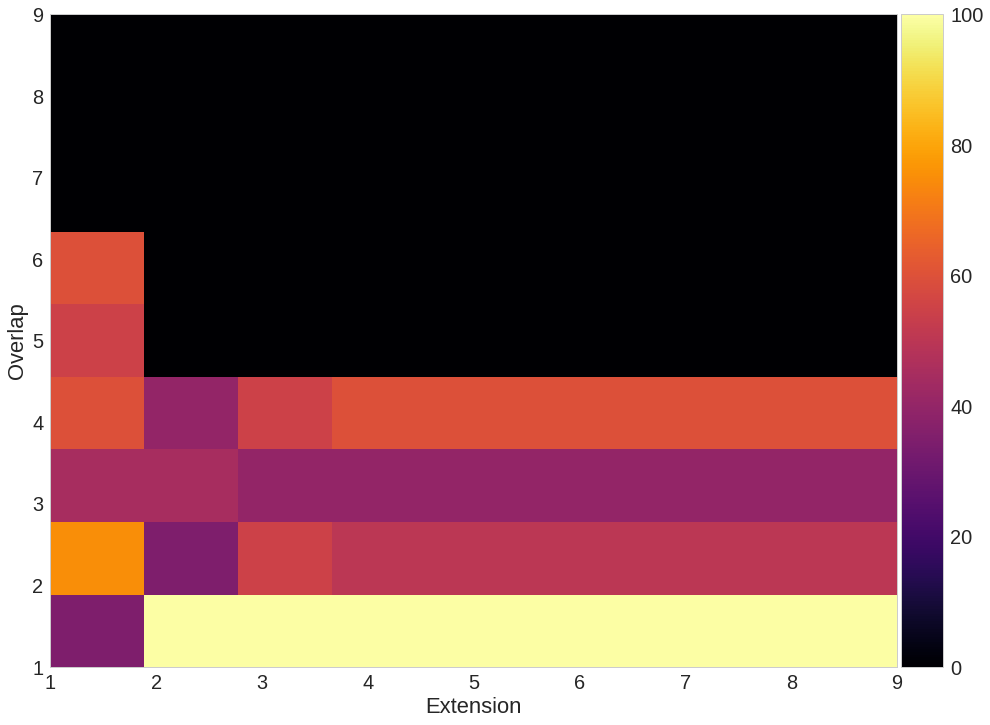

In [53]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
cmap = 'inferno'
extent = [extension_vector[0], extension_vector[-1], overlap_vector[0], overlap_vector[-1], ]

im = ax.imshow(total_success_extension, origin='lower', cmap=cmap, interpolation='None',
               extent=extent, aspect='auto')

ax.set_xlabel('Extension')
ax.set_ylabel('Overlap')

divider1 = make_axes_locatable(ax)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax1, orientation='vertical');

#### Git machinery

In [ ]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])